In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors

In [2]:
# https://anaconda.org/conda-forge/mlxtend
from mlxtend.plotting import plot_decision_regions
import pandas as pd

In [3]:
def knn_comparision(data, k):
    X = data[['x1','x2']].values
    y = data['y'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Plotting decision regions
    plot_decision_regions(X, y, clf=clf, legend=2)

    # Adding axes annotations
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Knn with K='+ str(k))
    plt.show()

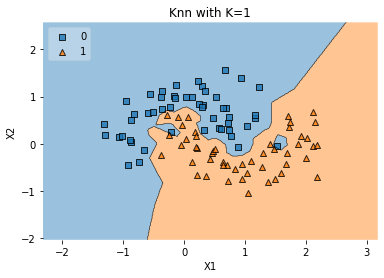

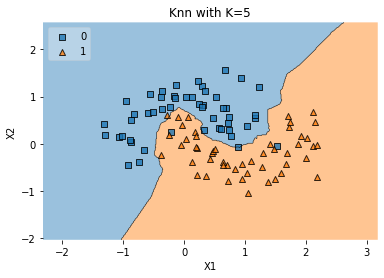

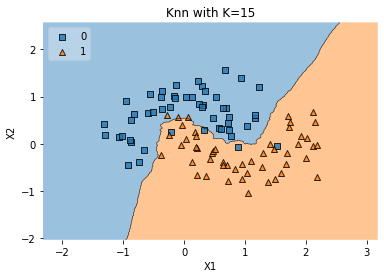

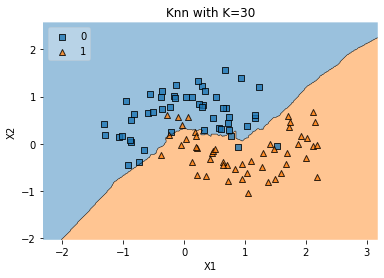

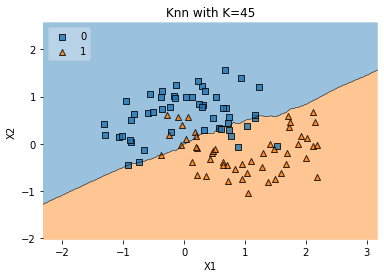

In [4]:
data = pd.read_csv('1.ushape.csv', names=['x1', 'x2', 'y'])
for i in [1, 5, 15, 30, 45]:
    knn_comparision(data, i)

         x1         x2  y
0 -2.543456 -10.816358  0
1  9.434466  -2.572000  0
2  3.368646 -10.194671  0


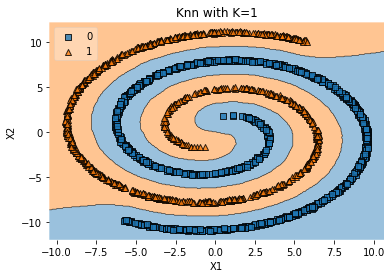

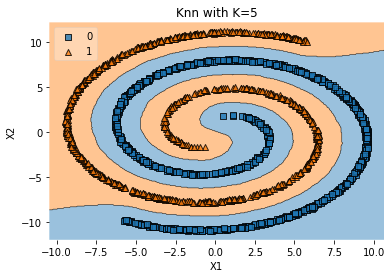

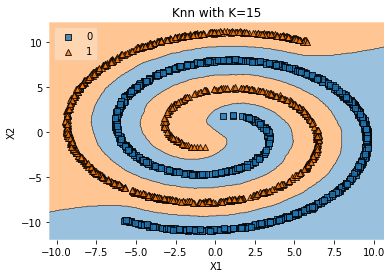

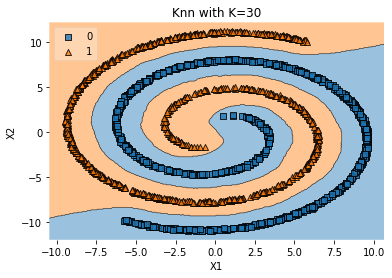

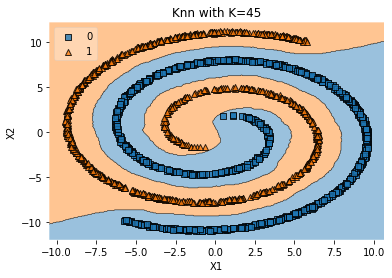

In [5]:
data = pd.read_csv('8.twospirals.csv', names=['x1', 'x2', 'y'])
print(data.head(3))
for i in [1, 5, 15, 30, 45]:
    knn_comparision(data, i)

In [6]:
#cross validation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import accuracy_score


In [7]:
#cross validation general then with 10 folds
names=['x','y','class']
df=pd.read_csv('1.ushape.csv',header=None,names=names)
print(df.head())

          x         y  class
0  0.031595  0.986988    0.0
1  2.115098 -0.046244    1.0
2  0.882490 -0.075756    0.0
3 -0.055144 -0.037332    1.0
4  0.829545 -0.539321    1.0


In [8]:
#splitting the data into train and test and further into cross validation 
x=np.array(df.iloc[:,0:2])
y=np.array(df['class'])
x_tr,x_test,y_tr,y_test=model_selection.train_test_split(x,y,test_size=0.3,random_state=0)
x_tr,x_cv,y_tr,y_cv=model_selection.train_test_split(x_tr,y_tr,test_size=0.3,random_state=0)
for i in range(1,30,2):
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    pred=knn.predict(x_cv)
    #accuracy score for cross validation data
    acc=metrics.accuracy_score(y_cv,pred,normalize=True)*float(100)
    print("Accuracy score for k=%d is %d%%" % (i,acc))

Accuracy score for k=1 is 85%
Accuracy score for k=3 is 90%
Accuracy score for k=5 is 90%
Accuracy score for k=7 is 90%
Accuracy score for k=9 is 95%
Accuracy score for k=11 is 95%
Accuracy score for k=13 is 85%
Accuracy score for k=15 is 85%
Accuracy score for k=17 is 85%
Accuracy score for k=19 is 76%
Accuracy score for k=21 is 76%
Accuracy score for k=23 is 76%
Accuracy score for k=25 is 76%
Accuracy score for k=27 is 76%
Accuracy score for k=29 is 76%


In [9]:
#check the accuracy score for the test data
for i in range(1,30,2):
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    pred=knn.predict(x_test)
    acc=metrics.accuracy_score(y_test,pred,normalize=True)*float(100)
    print("Accuracy score for test data k=%d is %d%%" %(i,acc))

Accuracy score for test data k=1 is 96%
Accuracy score for test data k=3 is 93%
Accuracy score for test data k=5 is 96%
Accuracy score for test data k=7 is 93%
Accuracy score for test data k=9 is 93%
Accuracy score for test data k=11 is 93%
Accuracy score for test data k=13 is 93%
Accuracy score for test data k=15 is 86%
Accuracy score for test data k=17 is 86%
Accuracy score for test data k=19 is 86%
Accuracy score for test data k=21 is 80%
Accuracy score for test data k=23 is 80%
Accuracy score for test data k=25 is 73%
Accuracy score for test data k=27 is 76%
Accuracy score for test data k=29 is 76%


optimal value of k is  3


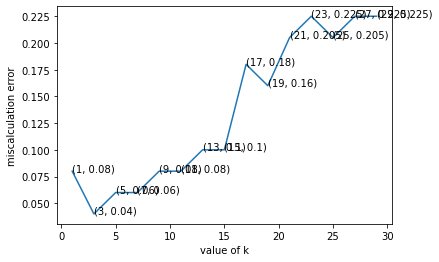

the miscalculation error for each value of k [0.08  0.04  0.06  0.06  0.08  0.08  0.1   0.1   0.18  0.16  0.205 0.225
 0.205 0.225 0.225]


In [10]:
#10 fold cross validation
mylist=list(range(0,30))
n = list(filter(lambda x: x % 2 != 0, mylist))
cv_scores=[]
for i in n:
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,x_tr,y_tr,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    mse=[1-x for x in cv_scores]
optimal_k=n[mse.index(min(mse))]
print("optimal value of k is ",optimal_k)
plt.plot(n,mse)
for xy in zip(n, np.round(mse,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel("value of k")
plt.ylabel("miscalculation error")
plt.show()
print("the miscalculation error for each value of k",np.round(mse,3))
    

In [11]:
#calculating accuracy for optimal value of k
knn=neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_tr,y_tr)
pred=knn.predict(x_test)
ac=accuracy_score(y_test,pred,normalize=True)*float(100)
print("The accuracy for the optimal value of k=3 is ",ac)

The accuracy for the optimal value of k=3 is  93.33333333333333


In [12]:
names=['x','y','class']
df=pd.read_csv('8.twospirals.csv',header=None,names=names)
print(df.head())

          x          y  class
0 -2.543456 -10.816358      0
1  9.434466  -2.572000      0
2  3.368646 -10.194671      0
3  1.341407  -4.204140      0
4  9.547758  -2.220580      0


In [13]:
x=np.array(df.iloc[:,0:2])
y=np.array(df['class'])
x_tr,x_test,y_tr,y_test=model_selection.train_test_split(x,y,test_size=0.3,random_state=0)
x_tr,x_cv,y_tr,y_cv=model_selection.train_test_split(x_tr,y_tr,test_size=0.3,random_state=0)
for i in range(1,30,2):
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    pred=knn.predict(x_cv)
    #accuracy score for cross validation data
    acc=metrics.accuracy_score(y_cv,pred,normalize=True)*float(100)
    print("Accuracy score for k=%d is %d%%" % (i,acc))

Accuracy score for k=1 is 100%
Accuracy score for k=3 is 100%
Accuracy score for k=5 is 100%
Accuracy score for k=7 is 100%
Accuracy score for k=9 is 100%
Accuracy score for k=11 is 100%
Accuracy score for k=13 is 100%
Accuracy score for k=15 is 100%
Accuracy score for k=17 is 100%
Accuracy score for k=19 is 100%
Accuracy score for k=21 is 100%
Accuracy score for k=23 is 100%
Accuracy score for k=25 is 100%
Accuracy score for k=27 is 100%
Accuracy score for k=29 is 100%


In [14]:
for i in range(1,30,2):
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    pred=knn.predict(x_test)
    acc=metrics.accuracy_score(y_test,pred,normalize=True)*float(100)
    print("Accuracy score for test data k=%d is %d%%" %(i,acc))

Accuracy score for test data k=1 is 100%
Accuracy score for test data k=3 is 100%
Accuracy score for test data k=5 is 100%
Accuracy score for test data k=7 is 100%
Accuracy score for test data k=9 is 100%
Accuracy score for test data k=11 is 100%
Accuracy score for test data k=13 is 100%
Accuracy score for test data k=15 is 100%
Accuracy score for test data k=17 is 100%
Accuracy score for test data k=19 is 100%
Accuracy score for test data k=21 is 100%
Accuracy score for test data k=23 is 100%
Accuracy score for test data k=25 is 100%
Accuracy score for test data k=27 is 100%
Accuracy score for test data k=29 is 100%


optimal value of k is  1


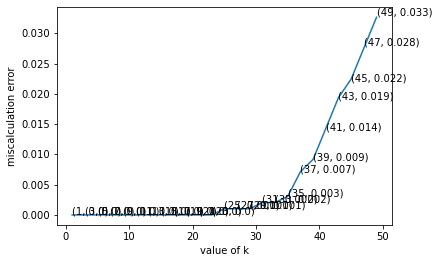

the miscalculation error for each value of k [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.001 0.001 0.001 0.002 0.002 0.003 0.007 0.009 0.014 0.019 0.022 0.028
 0.033]


In [15]:
mylist=list(range(0,50))
n = list(filter(lambda x: x % 2 != 0, mylist))
cv_scores=[]
for i in n:
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,x_tr,y_tr,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    mse=[1-x for x in cv_scores]
optimal_k=n[mse.index(min(mse))]
print("optimal value of k is ",optimal_k)
plt.plot(n,mse)
for xy in zip(n, np.round(mse,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel("value of k")
plt.ylabel("miscalculation error")
plt.show()
print("the miscalculation error for each value of k",np.round(mse,3))
    

In [16]:
#calculating accuracy for the optimal value of k
knn=neighbors.KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x_tr,y_tr)
pred=knn.predict(x_test)
ac=accuracy_score(y_test,pred,normalize=True)*float(100)
print("The accuracy for the optimal value of k is ",ac)

The accuracy for the optimal value of k is  100.0


In [17]:
names=['x','y','class']
df=pd.read_csv('8.twospirals.csv',header=None,names=names)
print(df.head())

          x          y  class
0 -2.543456 -10.816358      0
1  9.434466  -2.572000      0
2  3.368646 -10.194671      0
3  1.341407  -4.204140      0
4  9.547758  -2.220580      0


[1.0]
[1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

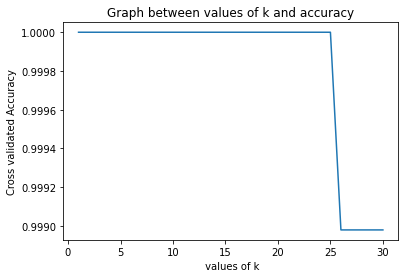

In [18]:

x=np.array(df.iloc[:,0:10])
y=np.array(df['class'])
x_tr,x_test,y_tr,y_test=model_selection.train_test_split(x,y,test_size=0.3,random_state=0)
x_tr,x_cv,y_tr,y_cv=model_selection.train_test_split(x_tr,y_tr,test_size=0.3,random_state=0)
k_range=range(1,31)
k_scores=[]
for i in k_range:
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,x_tr,y_tr,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    print(k_scores)
plt.plot(k_range,k_scores)
plt.xlabel(" values of k")
plt.ylabel("Cross validated Accuracy")
plt.title(label="Graph between values of k and accuracy")
plt.show()
    
    

In [19]:
mylist=list(range(0,50))
n = list(filter(lambda x: x % 2 != 0, mylist))
cv_scores=[]
for i in n:
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,x_tr,y_tr,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    print(cv_scores)

[1.0]
[1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989795918367348]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989795918367348, 0.9989795918367348]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989795918367348, 0.9989795918367348, 0.9989795918367348]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989795918367348, 0.9989795918367348, 0.9989795918367348, 0.9979591836734695]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.

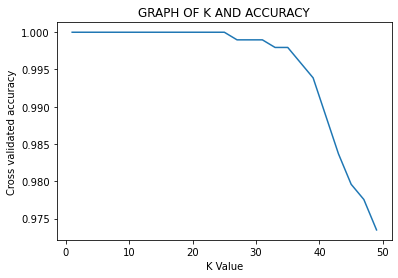

In [20]:
import matplotlib.pyplot as plt
plt.plot(n,cv_scores)
plt.xlabel('K Value')
plt.ylabel('Cross validated accuracy')
plt.title(label="GRAPH OF K AND ACCURACY")
plt.show()

In [22]:
from sklearn import svm,datasets
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower']=iris.target
df['flower']=df['flower'].apply(lambda x:iris.target_names[x])
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [27]:
model=svm.SVC(kernel='rbf',C=30,gamma='auto')
x=np.array(df.iloc[:,0:2])
y=np.array(df['flower'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
model.fit(x_train,y_train)
model.score(x_test,y_test)
#the accuracy of the svm model on this particular dataset is 75%

0.7555555555555555